In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import collections
import ast
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re

sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
title_fontsize = 15

In [4]:
tweets = pd.read_csv('./data/tweets_cleaned_tokenized_words.csv', 
                     parse_dates=['Date'], index_col=['Unnamed: 0'])

In [6]:
tweets['Lemmatized_tokens'] = tweets['Lemmatized_tokens'].apply(lambda x: ast.literal_eval(x))
tweets.to_csv('./data/tweets_cleaned_tokenized_words.csv')

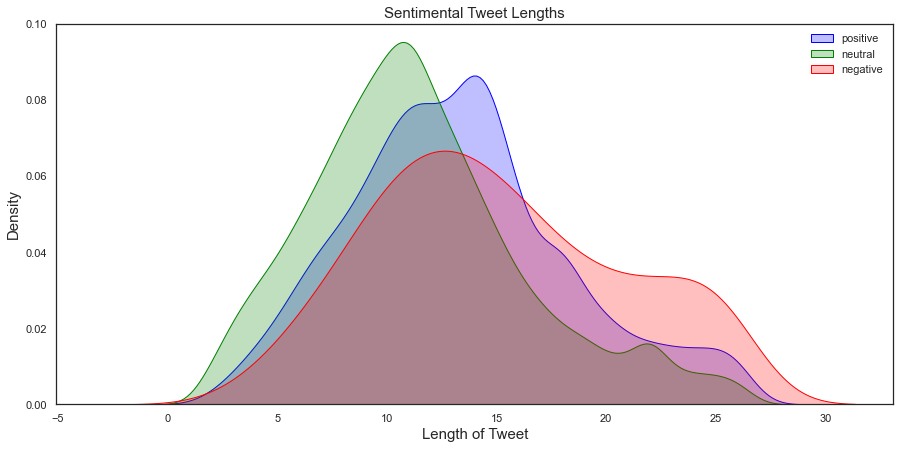

In [113]:
labels = ['positive', 'neutral', 'negative']
colors = ['blue', 'green', 'red']

for label, color in zip(labels, colors):
    data = tweets[tweets['label'] == label]
    sns.kdeplot(data['word_length'], shade=True, label=label, color=color, bw_adjust=3)

plt.xlabel('Length of Tweet', fontsize=title_fontsize)
plt.ylabel('Density', fontsize=title_fontsize)
plt.title('Sentimental Tweet Lengths', fontsize=title_fontsize)

plt.legend(labels, frameon=False)
plt.savefig('./visualization/Sentimental_Tweet_Lengths.png', dpi = 600)
plt.show()

In [238]:
lemmatized_tokens = list(tweets['Lemmatized_tokens'])
tokens_list = list(itertools.chain(*lemmatized_tokens))
counts = collections.Counter(tokens_list)
clean_tweets = pd.DataFrame(counts.most_common(21),
                           columns = ['words', 'counts'])

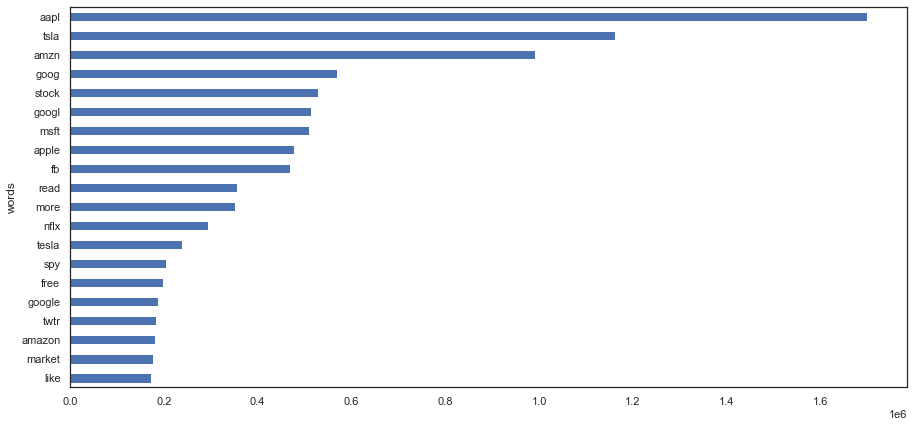

In [182]:
clean_tweets.drop(4).sort_values('counts').plot.barh(x='words', y='counts', legend=False)
plt.savefig('./visualization/20 most common words.png', dpi = 600)

In [9]:
lemmatized_tokens = list(tweets['Lemmatized_tokens'])
tokens_list = list(itertools.chain(*lemmatized_tokens))

In [11]:
words = [x for x in tokens_list if not re.search('…|“', x)]

df = pd.DataFrame(words)

In [13]:
pd.read_csv('./data/all_words_split.csv')

In [ ]:
words = ' '.join([x for x in tokens_list if not re.search('…|“', x)])
words

In [219]:
wordcloud = WordCloud(width=1200, height=800,
                      background_color='white',
                      stopwords = stopwords.words('english'),
                      min_font_size=10).generate(str(words))

SyntaxError: invalid syntax (825346939.py, line 4)

In [ ]:
df[df['Lemmatized_tokens'].str.contains('o')]

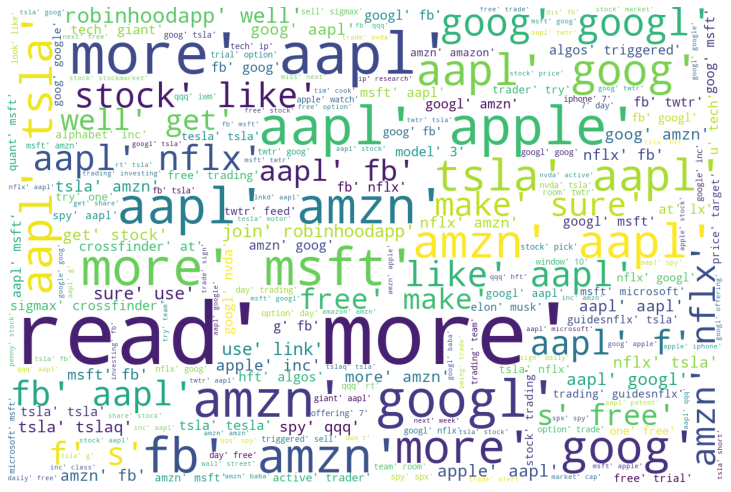

In [186]:
plt.figure(facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.savefig('./visualization/WordCloud.png', dpi = 600)
plt.show()

In [215]:
wordcloud.words_

{"read' more'": 1.0,
 "more' aapl'": 0.33761099731874666,
 "aapl' apple'": 0.28345744331448297,
 "amzn' googl'": 0.26203428899014086,
 "more' msft'": 0.2590962563970882,
 "aapl' amzn'": 0.24781289748535462,
 "fb' amzn'": 0.23091622426982128,
 "amzn' aapl'": 0.21336565965400486,
 "more' goog'": 0.20673418568127125,
 "tsla' aapl'": 0.18902537337497538,
 "aapl' goog'": 0.18601269564490414,
 "aapl' tsla'": 0.18431675813184123,
 "goog' googl'": 0.17786144668247153,
 "like' aapl'": 0.1752190088320126,
 "aapl' nflx'": 0.17482786831403507,
 "stock' like'": 0.17005356535032456,
 "amzn' nflx'": 0.1640909118052777,
 "fb' aapl'": 0.1630787237473053,
 "aapl' f'": 0.16182169963991186,
 "make' sure'": 0.16180079900154665,
 "f' s'": 0.15746242363802482,
 "well' get'": 0.1574415229996596,
 "aapl' fb'": 0.15739673591744846,
 "s' free'": 0.15726834628177644,
 "free' make'": 0.1570324676487976,
 "robinhoodapp' well'": 0.15528577144256206,
 "join' robinhoodapp'": 0.15516335341785154,
 "sure' use'": 0.15509

,words,counts
0,aapl,1698955
1,tsla,1161402
2,amzn,990392
3,goog,569944
4,…,569210
...,...,...
1055777,pagasa,1
1055778,zeynepsu,1
1055779,associatespune,1
1055780,uxu…,1


In [ ]:
list(tweet_counts)